In [ ]:
https://medium.com/@sheikh.sahil12299/mastering-volatility-forecasting-with-garch-models-a-deep-dive-into-financial-market-dynamics-8df73c037b7e

In [ ]:
!pip install yfinance pandas numpy arch matplotlib

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [15]:
# Fetch data for TCS from Yahoo Finance
ticker = 'TCS.NS'
start_date = '2015-01-01'
end_date = '2024-01-01'

# Download the data
tcs_data = yf.download(ticker, start=start_date, end=end_date)




# Check the first few rows of the data
tcs_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1050.999023,1059.855215,1049.120413,1059.855215,366830
2015-01-02,1064.995483,1069.743569,1053.084043,1053.249154,925740
2015-01-05,1048.810547,1073.438614,1042.369627,1065.635281,1754242
2015-01-06,1010.145203,1044.207565,1007.420173,1044.207565,2423784
2015-01-07,998.212646,1023.583917,993.980657,1019.806133,2636332


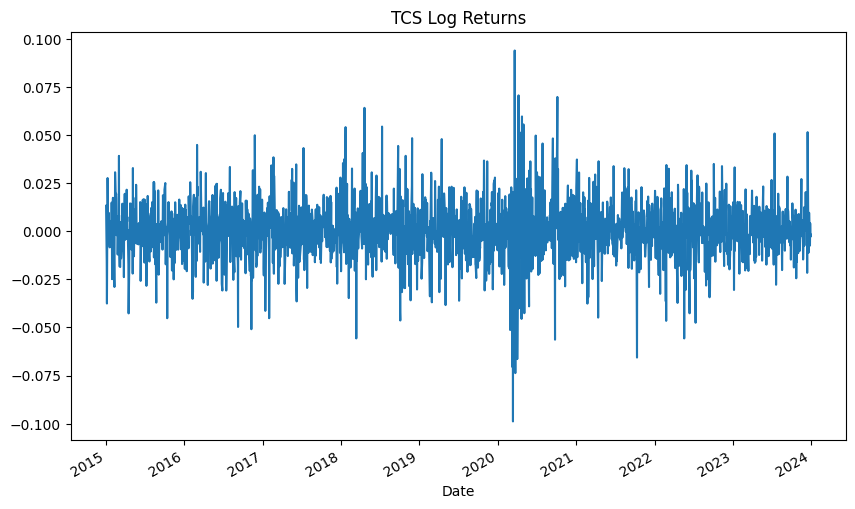

In [16]:
# Calculate daily log returns
tcs_data['Log_Returns'] = np.log(tcs_data['Close'] / tcs_data['Close'].shift(1))

# Drop missing values (first row will be NaN due to shift)
tcs_data = tcs_data.dropna()

# Plot log returns to visualize the data
tcs_data['Log_Returns'].plot(title='TCS Log Returns', figsize=(10, 6))
plt.show()

In [17]:
# Define the EGARCH model (1,1)
model = arch_model(tcs_data['Log_Returns'], vol='EGARCH', p=1, q=1)

# Fit the model
egarch_fit = model.fit(disp='off')

# Print the model summary
print(egarch_fit.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                6273.74
Distribution:                  Normal   AIC:                          -12539.5
Method:            Maximum Likelihood   BIC:                          -12516.7
                                        No. Observations:                 2220
Date:                Fri, Mar 14 2025   Df Residuals:                     2219
Time:                        12:50:02   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.6231e-04  2.694e-04      1.716  8.618e-02 

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [18]:
# Forecast volatility for the next 30 days
forecast_horizon = 30
volatility_forecast = egarch_fit.forecast(horizon=forecast_horizon,method='bootstrap')

# Extract the forecasted volatility (standard deviation) from the model
forecasted_volatility = np.sqrt(volatility_forecast.variance.values[-1, :])

# Display the forecasted volatility
print("Forecasted Volatility for the next 30 days:")
print(forecasted_volatility)

Forecasted Volatility for the next 30 days:
[0.01288557 0.01300133 0.0131705  0.01324607 0.01338604 0.01349645
 0.01355309 0.01364244 0.01364899 0.01369191 0.01374525 0.01381536
 0.01390882 0.01396866 0.01398559 0.01404092 0.01412476 0.01413941
 0.01417063 0.01422418 0.01426048 0.01430233 0.01437306 0.01437755
 0.01441334 0.01439045 0.01442124 0.01443041 0.01445297 0.0144183 ]


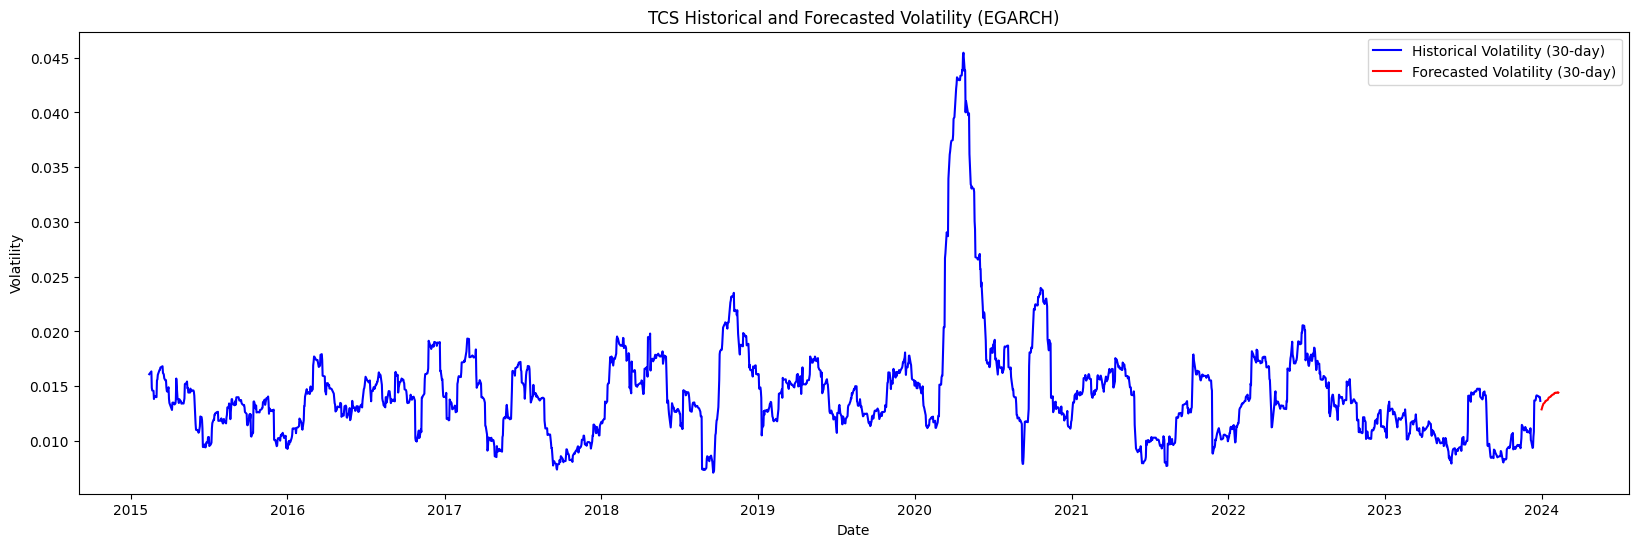

In [19]:
# Plot the historical and forecasted volatility
plt.figure(figsize=(20, 6))

# Historical volatility (rolling 30-day standard deviation of log returns)
historical_volatility = tcs_data['Log_Returns'].rolling(window=30).std()

# Plot historical volatility
plt.plot(historical_volatility, label='Historical Volatility (30-day)', color='blue')

# Plot forecasted volatility (append to the end of historical data)
future_dates = pd.date_range(tcs_data.index[-1], periods=forecast_horizon+1, freq='B')[1:]
forecast_volatility_series = pd.Series(forecasted_volatility, index=future_dates)

# Plot forecasted volatility
plt.plot(forecast_volatility_series, label='Forecasted Volatility (30-day)', color='red')

# Add labels and legend
plt.title('TCS Historical and Forecasted Volatility (EGARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()